In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [4]:
boston_dataset = datasets.load_boston()

In [5]:
boston_pd = pd.DataFrame(boston_dataset.data)
boston_pd.columns = boston_dataset.feature_names
boston_pd_target = np.asarray(boston_dataset.target)
boston_pd['House Price'] = pd.Series(boston_pd_target)


X=boston_pd.iloc[:, :-1]
Y=boston_pd.iloc[:, -1]
print(boston_pd.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  House Price  
0     15.3  396.90   4.98         24.0  
1     17.8  396.90   9.14         21.6  
2     17.8  392.83   4.03         34.7  
3     18.7  394.63   2.94         33.4  
4     18.7  396.90   5.33         36.2  


In [6]:
x_train,x_test,y_train,y_test=train_test_split(
boston_pd.iloc[:, :-1],boston_pd.iloc[:,-1],
test_size = 0.25)

print('Train data shape of X = % s and Y = % s : '%(
x_train.shape, y_train.shape))

print('Train data shape of X = % s and Y = % s : '%(
x_test.shape, y_test.shape))


Train data shape of X = (379, 13) and Y = (379,) : 
Train data shape of X = (127, 13) and Y = (127,) : 


In [7]:
lreg = LinearRegression()
lreg.fit(x_train,y_train)

LinearRegression()

In [8]:
lreg_y_pred=lreg.predict(x_test)

In [9]:
mean_squared_error= np.mean((lreg_y_pred - y_test)**2)
print('Mean Squared Error on test set : ',mean_squared_error)

Mean Squared Error on test set :  22.58436561297569


In [10]:
lreg_coefficient = pd.DataFrame()
lreg_coefficient['columns']= x_train.columns
lreg_coefficient['Coefficeient Estimate ']=pd.Series(lreg.coef_)
print(lreg_coefficient)

    columns  Coefficeient Estimate 
0      CRIM               -0.109436
1        ZN                0.042067
2     INDUS               -0.052937
3      CHAS                2.636125
4       NOX              -18.687709
5        RM                3.357572
6       AGE                0.016548
7       DIS               -1.600194
8       RAD                0.292487
9       TAX               -0.010607
10  PTRATIO               -1.000469
11        B                0.007575
12    LSTAT               -0.616695


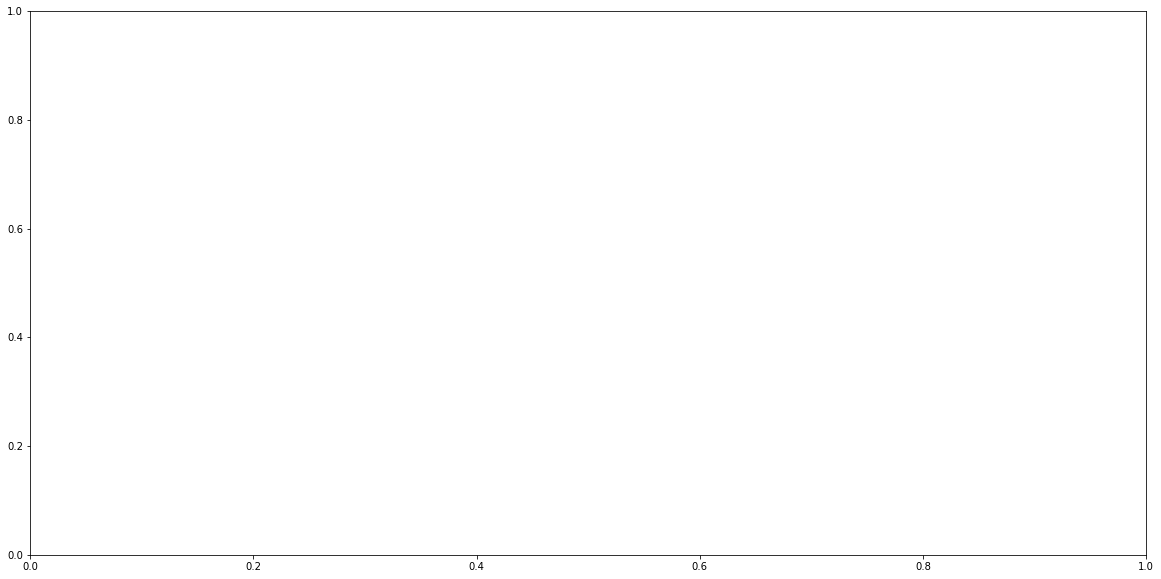

In [11]:
fig, ax=plt.subplots(figsize=(20,10))

color=['tab:gray','tab:blue','tab:purple','tab:orange',
'tab:green','tab:red','tab:brown','tab:pink','tab:olive',
'tab:cyan','tab:blue','tab:olive','tab:green']



In [12]:
ax.bar(lreg_coefficient['Columns'],
lreg_coefficient['Coefficient Estimate'],
color=color)




KeyError: 'Columns'

In [ ]:
ax.spines['bottom'].set_position('zero')



In [ ]:


plt.style.use('ggplot')
plt.show()

In [ ]:
from sklearn.linear_model import Ridge
ridgeR = Ridge(alpha=1)
ridgeR.fit(x_train,y_train)
y_pred = ridgeR.predict(x_test)

In [ ]:
mean_squared_error_ridge= np.mean((y_pred - y_test)**2)
print('Mean Squared Error on test set : ',mean_squared_error_ridge)

In [ ]:
ridge_coefficient = pd.DataFrame()
ridge_coefficient['columns']= x_train.columns
ridge_coefficient['Coefficeient Estimate ']=pd.Series(ridgeR.coef_)
print(ridge_coefficient)

In [ ]:
fig, ax=plt.subplots(figsize=(20,10))

color=['tab:gray','tab:blue','tab:orange',
'tab:green','tab:red','tab:purple','tab:brown',
'tab:pink','tab:gray','tab:olive','tab:cyan',
'tab:orange','tab:blue','tab:olive','tab:green']

In [ ]:
ax.bar(lreg_coefficient['columns'],
lreg_coefficient['Coefficient Estimate'],
color = color)

In [ ]:
ax.spines['bottom'].set_position('zero')

In [ ]:
plt.style.use('ggplot')
plt.show()

### lasso regression

In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1)
lasso.fit(x_train,y_train)
y_pred1 = lasso.predict(x_test)

In [ ]:
mean_squared_error= np.mean((y_pred1 - y_test)**2)
print('Mean Squared Error on test set : ',mean_squared_error)

In [ ]:
lasso_coeff = pd.DataFrame()
lasso_coeff['columns']= x_train.columns
lasso_coeff['Coefficeient Estimate ']=pd.Series(lasso.coef_)
print(lasso_coeff)

In [ ]:
fig, ax=plt.subplots(figsize=(20,10))

color=['tab:gray','tab:blue','tab:orange',
'tab:green','tab:red','tab:purple','tab:brown',
'tab:pink','tab:gray','tab:olive','tab:cyan',
'tab:orange','tab:blue','tab:olive','tab:green']

In [ ]:
ax.bar(lreg_coefficient['columns'],
lreg_coefficient['Coefficient Estimate'],
color = color)

In [ ]:
ax.spines['bottom'].set_position('zero')

In [ ]:
plt.style.use('ggplot')
plt.show()